<a href="https://colab.research.google.com/github/BelenKohl/SRMP/blob/main/Dec19_Kohl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/BelenKohl/SRMP.git

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv('Gaia_Prot_cmatch.csv')

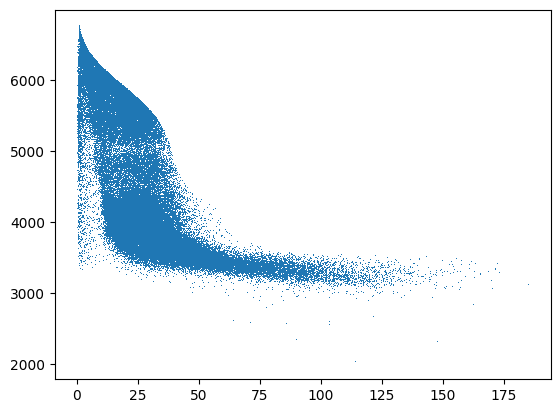

In [11]:
plt.plot(df['Prot'], df['teff_calc'], ',')

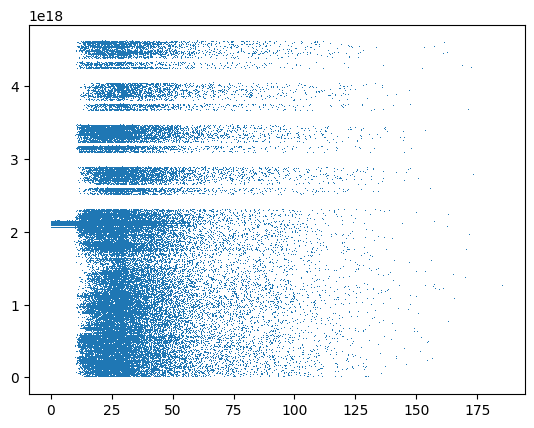

In [12]:
plt.plot(df['Prot'], df['source_id'], ',')

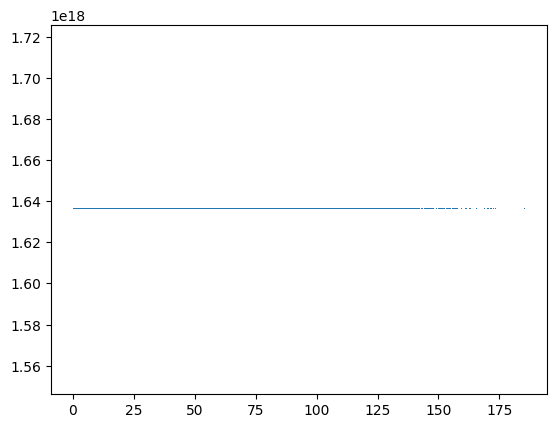

In [13]:
plt.plot(df['Prot'], df['solution_id'], ',')

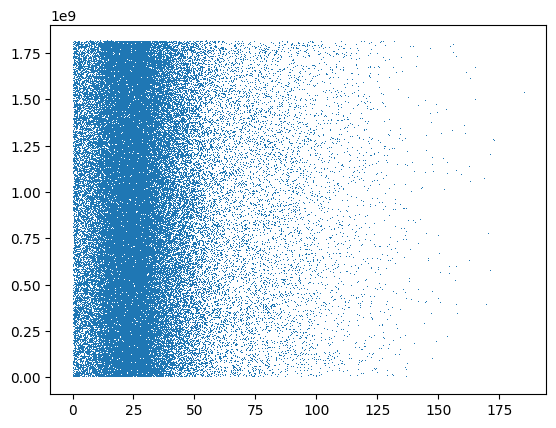

In [14]:
plt.plot(df['Prot'], df['random_index'], ',')

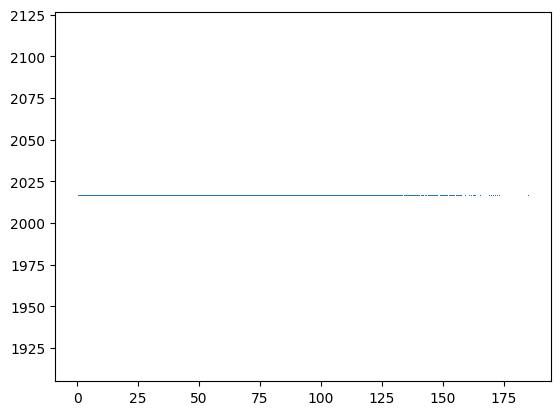

In [15]:
plt.plot(df['Prot'], df['ref_epoch'], ',')

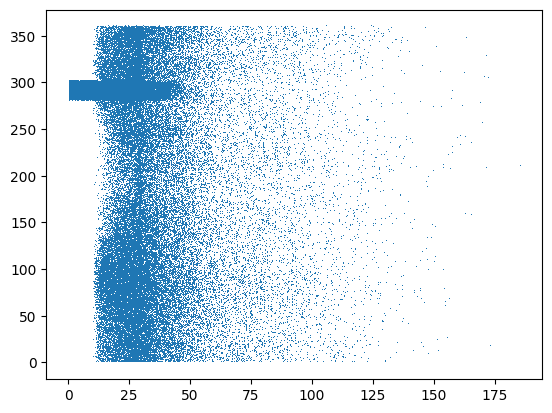

In [16]:
plt.plot(df['Prot'], df['ra'], ',')

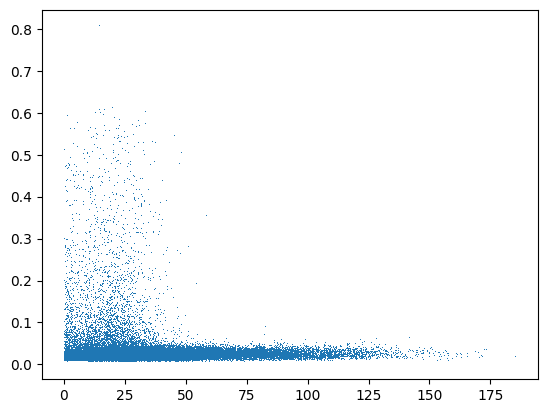

In [17]:
plt.plot(df['Prot'], df['ra_error'], ',')

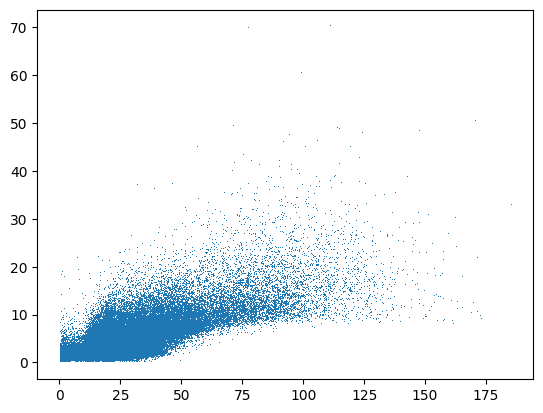

In [18]:
plt.plot(df['Prot'], df['parallax'], ',')

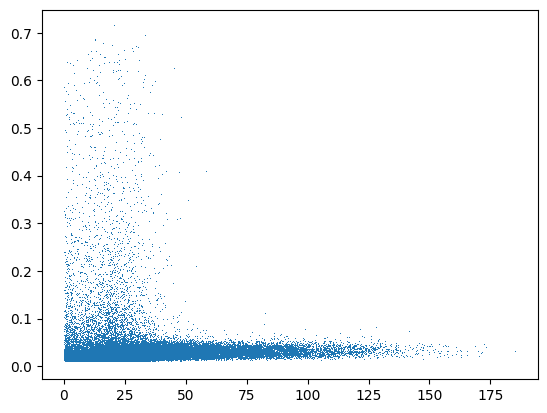

In [19]:
plt.plot(df['Prot'], df['parallax_error'], ',')

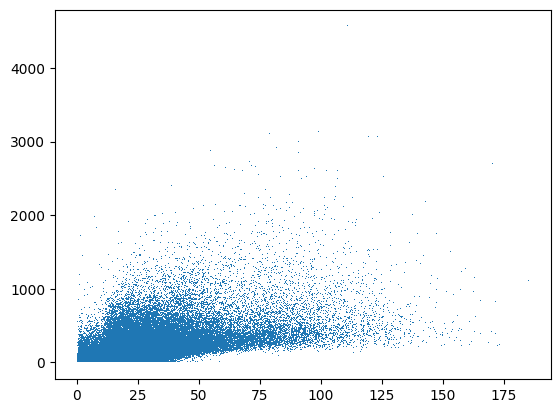

In [20]:
plt.plot(df['Prot'], df['parallax_over_error'], ',')

In [ ]:
plt.plot(df['Prot'], df['pm'], ',')

In [ ]:
plt.plot(df['Prot'], df['pmra'], ',')

In [ ]:
plt.plot(df['Prot'], df['pmra_error'], ',')

In [ ]:
plt.plot(df['Prot'], df['pmdec'], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')

In [ ]:
plt.plot(df['Prot'], df[], ',')